<a href="https://colab.research.google.com/github/deepakgowtham/EVA4/blob/master/Week8/Session_8_CIFAR_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!cp -rp '/content/drive/My Drive/py_files/models' .
!cp -rp '/content/drive/My Drive/py_files/utils' .

In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from models.resnet import ResNet18

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [4]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


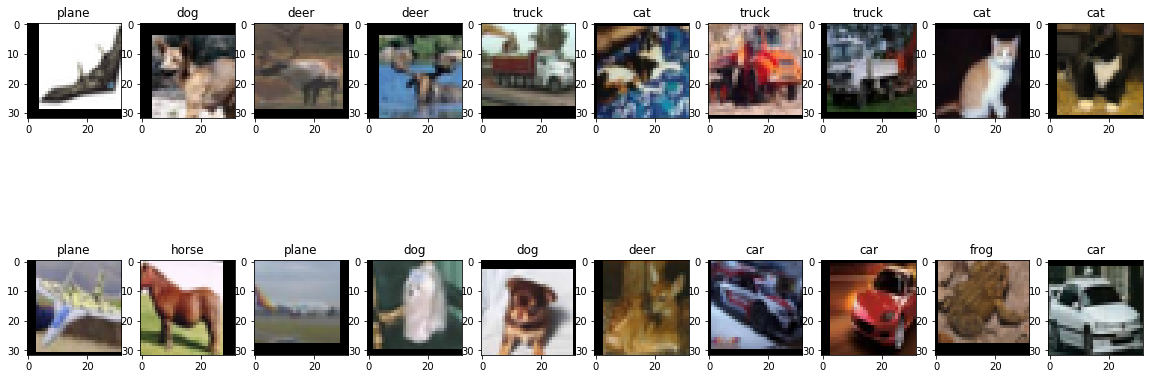

In [5]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [7]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
         Dropout2d-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
        Dropout2d-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [8]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=20)

for epoch in range(1, 21):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate [0.020000000000000018]


/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.8035002946853638 Batch_id=781 Accuracy=30.75: 100%|██████████| 782/782 [00:34<00:00, 22.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.5228, Accuracy: 4279/10000 (42.79%)

Epoch: 2 Learning_Rate [0.06583592135001265]


Loss=1.6843522787094116 Batch_id=781 Accuracy=42.23: 100%|██████████| 782/782 [00:35<00:00, 22.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3080, Accuracy: 5242/10000 (52.42%)

Epoch: 3 Learning_Rate [0.18583592135001265]


Loss=1.354653000831604 Batch_id=781 Accuracy=51.26: 100%|██████████| 782/782 [00:35<00:00, 21.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2146, Accuracy: 5693/10000 (56.93%)

Epoch: 4 Learning_Rate [0.3341640786499874]


Loss=0.6501651406288147 Batch_id=781 Accuracy=59.21: 100%|██████████| 782/782 [00:35<00:00, 22.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0128, Accuracy: 6590/10000 (65.90%)

Epoch: 5 Learning_Rate [0.45416407864998737]


Loss=1.7875595092773438 Batch_id=781 Accuracy=66.07: 100%|██████████| 782/782 [00:35<00:00, 22.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8018, Accuracy: 7187/10000 (71.87%)

Epoch: 6 Learning_Rate [0.5]


Loss=0.7511695623397827 Batch_id=781 Accuracy=70.37: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8362, Accuracy: 7174/10000 (71.74%)

Epoch: 7 Learning_Rate [0.49373200311754367]


Loss=0.8394222855567932 Batch_id=781 Accuracy=74.06: 100%|██████████| 782/782 [00:35<00:00, 22.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6270, Accuracy: 7854/10000 (78.54%)

Epoch: 8 Learning_Rate [0.47524231600673683]


Loss=0.8493761420249939 Batch_id=781 Accuracy=76.76: 100%|██████████| 782/782 [00:34<00:00, 24.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6270, Accuracy: 7879/10000 (78.79%)

Epoch: 9 Learning_Rate [0.445458088785525]


Loss=0.5998517274856567 Batch_id=781 Accuracy=78.79: 100%|██████████| 782/782 [00:35<00:00, 22.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5600, Accuracy: 8133/10000 (81.33%)

Epoch: 10 Learning_Rate [0.40587282697488153]


Loss=0.464035302400589 Batch_id=781 Accuracy=80.53: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5490, Accuracy: 8213/10000 (82.13%)

Epoch: 11 Learning_Rate [0.3584715008956504]


Loss=0.2730313539505005 Batch_id=781 Accuracy=82.04: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4759, Accuracy: 8378/10000 (83.78%)

Epoch: 12 Learning_Rate [0.30563101096814466]


Loss=0.9250630736351013 Batch_id=781 Accuracy=83.35: 100%|██████████| 782/782 [00:34<00:00, 22.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4544, Accuracy: 8479/10000 (84.79%)

Epoch: 13 Learning_Rate [0.250001]


Loss=0.278110146522522 Batch_id=781 Accuracy=84.23: 100%|██████████| 782/782 [00:34<00:00, 22.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4192, Accuracy: 8584/10000 (85.84%)

Epoch: 14 Learning_Rate [0.19437098903185537]


Loss=0.4726620018482208 Batch_id=781 Accuracy=85.68: 100%|██████████| 782/782 [00:34<00:00, 22.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3924, Accuracy: 8724/10000 (87.24%)

Epoch: 15 Learning_Rate [0.14153049910434962]


Loss=0.25406506657600403 Batch_id=781 Accuracy=86.91: 100%|██████████| 782/782 [00:34<00:00, 22.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3759, Accuracy: 8794/10000 (87.94%)

Epoch: 16 Learning_Rate [0.09412917302511849]


Loss=0.2218416929244995 Batch_id=781 Accuracy=88.13: 100%|██████████| 782/782 [00:34<00:00, 22.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3508, Accuracy: 8861/10000 (88.61%)

Epoch: 17 Learning_Rate [0.05454391121447502]


Loss=0.16115090250968933 Batch_id=781 Accuracy=89.02: 100%|██████████| 782/782 [00:34<00:00, 25.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3339, Accuracy: 8917/10000 (89.17%)

Epoch: 18 Learning_Rate [0.024759683993263143]


Loss=0.4736257493495941 Batch_id=781 Accuracy=90.03: 100%|██████████| 782/782 [00:34<00:00, 22.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3178, Accuracy: 8990/10000 (89.90%)

Epoch: 19 Learning_Rate [0.006269996882456277]


Loss=0.43444588780403137 Batch_id=781 Accuracy=90.82: 100%|██████████| 782/782 [00:34<00:00, 22.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3137, Accuracy: 8993/10000 (89.93%)

Epoch: 20 Learning_Rate [2e-06]


Loss=0.2591593265533447 Batch_id=781 Accuracy=90.71: 100%|██████████| 782/782 [00:34<00:00, 22.91it/s]



Test set: Average loss: 0.3187, Accuracy: 8990/10000 (89.90%)

